In [ ]:
import pandas as pd
import numpy as np
from plotutils import *
np.seterr(all='raise')

# logit

In [ ]:
logdir='../IPG/test/log'; date='05_03_2021'; solver='naive'; loss='logit'; lam_shrink=[0.1, 0.01]; percent=[0.1, 0.2];

In [ ]:
algo_df_dict_naive_adaptive = get_all_adaptive(logdir, date, loss, lam_shrink, percent, ts=[1e-12])
ppf = PerformanceProfile(algo_df_dict_naive_adaptive)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
naive_adaptive_best = 'naive-1e-12-none-inf'
print('Best params:', naive_adaptive_best)

In [4]:
algo_df_dict_schimdt = get_all_schimdt(logdir, date, loss, lam_shrink, percent, schimdt_consts=[1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11])
ppf = PerformanceProfile(algo_df_dict_schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', plot=False,show_num=True, options={'ratio_max':4})
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)

schimdt-none-0.1
 36/44 instances terminate with status:  0
  8/44 instances terminate with status:  2
schimdt-none-1.0
 41/44 instances terminate with status:  0
  3/44 instances terminate with status:  2
schimdt-none-10.0
 43/44 instances terminate with status:  0
  1/44 instances terminate with status:  2
schimdt-none-100.0
 44/44 instances terminate with status:  0
schimdt-none-1000.0
 44/44 instances terminate with status:  0
schimdt-none-10000.0
 44/44 instances terminate with status:  0
schimdt-none-100000.0
 44/44 instances terminate with status:  0
schimdt-none-1000000.0
 44/44 instances terminate with status:  0
schimdt-none-100000000000.0
 40/44 instances terminate with status:  0
  3/44 instances terminate with status:  1
  1/44 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.
Best params: schimdt-none-10000.0


In [5]:
pd.merge(algo_df_dict_naive_adaptive['naive-1e-12-none-inf'][['datasetid','subgrad_iters','time', 'status', 'nz', 'F']],
         algo_df_dict_schimdt['schimdt-none-0.1'][['datasetid','subgrad_iters','time', 'status', 'nz', 'F']],  
         on='datasetid', suffixes={"_MINE", "_SC"}).head(10)

,datasetid,subgrad_iters_SC,time_SC,status_SC,nz_SC,F_SC,subgrad_iters_MINE,time_MINE,status_MINE,nz_MINE,F_MINE
0,a9a_0.1_0.1,61259,16.437909,0,8,0.513365,5920558,884.440291,0,8,0.513363
1,australian_0.1_0.1,29,0.007184,0,1,0.693147,21,0.007818,0,1,0.693147
2,breast_cancer_0.1_0.1,7627,1.210337,0,0,0.308760,22722,2.502741,0,0,0.308758
3,german_numer_0.1_0.1,508,0.321746,0,0,0.558027,1526,0.323122,0,0,0.558022
4,ijcnn1_0.1_0.1,79510,11.335168,0,0,0.379732,235378,26.722282,0,0,0.379732
5,ionosphere_0.1_0.1,3547,0.895712,0,0,0.528966,23966,2.812172,0,0,0.528968
6,mushrooms_0.1_0.1,134327,23.037546,0,0,0.278282,14616986,2008.967988,2,5,0.283217
7,sonar_0.1_0.1,1647,1.249298,0,0,0.500224,12548,2.224235,0,0,0.500227
8,splice_0.1_0.1,1380,0.264411,0,0,0.558184,579,0.134830,0,0,0.558188
9,svmguide3_0.1_0.1,42923,5.101460,0,0,0.591144,33625,3.702608,0,0,0.591144


In [7]:
import matplotlib.pyplot as plt
from matplotlib import rc
final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
final[target] = df[target]
schimdt_cheat = 'schimdt-none-0.1'
final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
ppf = PerformanceProfile(final)
i = 0; j = 1; column = 'nnz'
algo1 = ppf.algo_lst[i]
algo2 = ppf.algo_lst[j]
data1 = ppf.algo_df_dic[algo1][column].copy()
data2 = ppf.algo_df_dic[algo2][column].copy()
data1.loc[data1 < 0] = np.inf
data2.loc[data2 < 0] = np.inf
ratio_original = (data1 / data2).to_numpy()
print(ratio_original)
# print(ratio[:7], len(ratio))
# print("===")
# print('hi', ratio[6], ratio[6]==0)
# ratio[ratio == 0] = 1e-16
# ratio = -np.log2(ratio)
# print(ratio[:7], len(ratio))
# print("===")
# ratio[ratio == -np.log2(1e-16)] = np.inf
# print(ratio[:7], len(ratio))
# print("===")
# ratio = ratio[~np.isnan(ratio)]
# print(ratio, len(ratio))
# print("===")
# bars_pos = np.zeros(ratio.shape)
# bars_neg = np.zeros(ratio.shape)
# flag = ratio > 0
# bars_pos[flag] = ratio[flag]
# bars_neg[~flag] = ratio[~flag]

# import numpy as np
# posmax = np.max(bars_pos[bars_pos != np.inf])
# negmin = np.min(bars_neg[bars_neg != -np.inf])
# ratio_max = max(posmax, -negmin)
# factor =1.5
# bars_pos[bars_pos == np.inf] = ratio_max * factor
# bars_neg[bars_neg == -np.inf] = -ratio_max * factor
# ppf.bars_pos = bars_pos
# ppf.bars_neg = bars_neg
# bars_pos[::-1].sort()
# bars_neg[::-1].sort()

# win_aoc =  np.around(np.sum(bars_pos), 3)
# lose_aoc = np.around(np.abs(np.sum(bars_neg)), 3)
# win = sum(flag)
# lose = sum(ratio < 0)
# # ratio, bars_pos, bars_neg
# figure = plt.figure()

# label_1 = algo1 + ' {}'.format(win)
# label_2 = algo2 + ' {}'.format(lose)

# label_1 += f' aoc:{win_aoc}'
# label_2 += f' aoc:{lose_aoc}'

# plt.bar(range(len(bars_pos)), bars_pos, color='b', label=label_1, width=1)
# plt.bar(range(len(bars_neg)), bars_neg, color='r', label=label_2, width=1)
# plt.xlim(-1, len(bars_pos) + 1)
# plt.ylim(-3, 3)
# plt.legend()
# plt.hlines(y=0, xmin=0 - 0.5, xmax=len(bars_pos) - 0.5, linewidth=1)
# plt.ylabel('-log2(ratio)', fontsize=13)

# if column == 'time':
#     text = 'computational time'
# elif column == 'fevals':
#     text = 'function evaluations'
# elif column == 'iteration':
#     text = 'iterations'
# elif column == 'subgrad_iters':
#     text = 'subgradient iterations'
# else:
#     text = column

# plt.title("Metric: {} (Area Under the Curve)".format(text))
# print(bars_pos, bars_neg)

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
[1.         1.         1.         1.         1.         1.
 1.83333333 1.         1.         1.         1.05263158 1.14285714
 1.         1.         1.         1.         1.2        1.33333333
 1.         1.         1.         1.05       1.25       1.
 1.         1.         1.         1.         1.1        1.
 1.         1.         1.         1.0625     1.         1.
 1.         1.         1.         1.15789474 1.         1.
 1.         1.        ]


## no safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instances are kept.


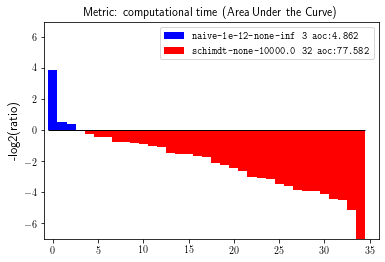

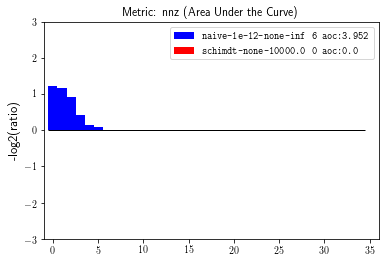

In [10]:
final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
# schimdt_cheat = 'schimdt-none-1.0'
# final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})
_ = ppf.plot(column='nnz',show_num=True, options={'ratio_max':3})

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 36 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 34 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 34 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instances are kept.
===
All algorithms failed in 0 

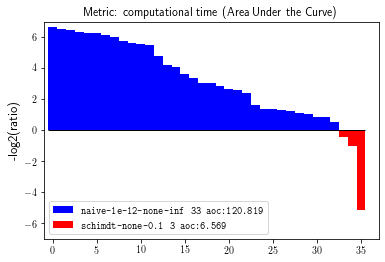

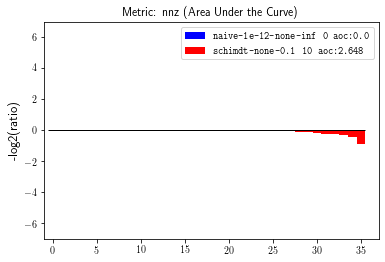

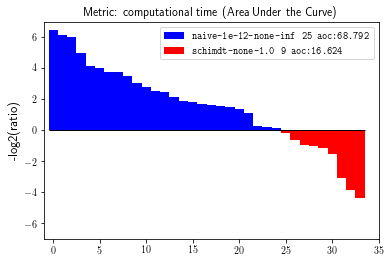

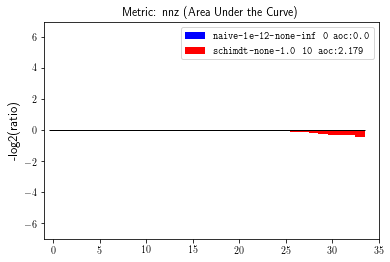

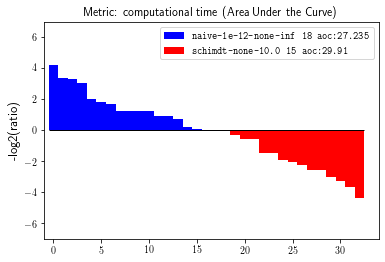

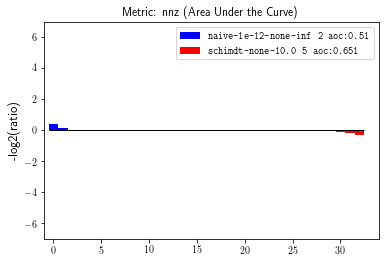

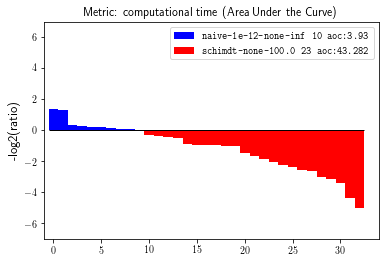

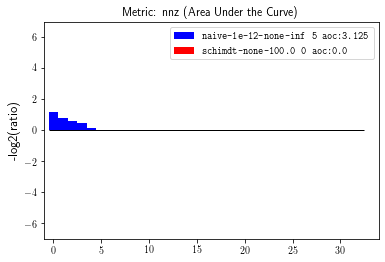

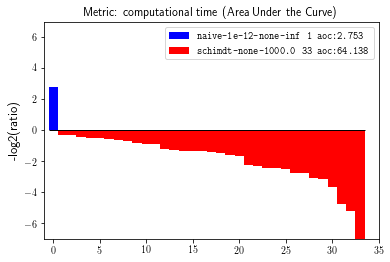

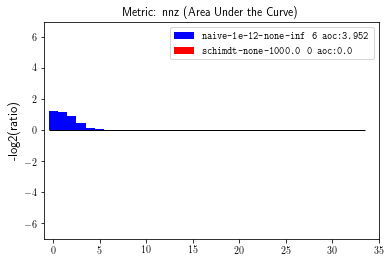

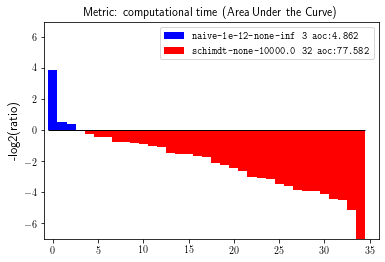

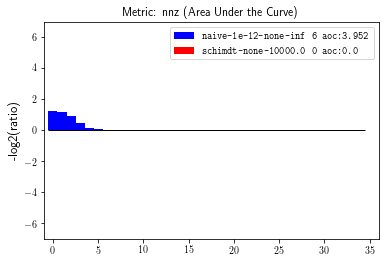

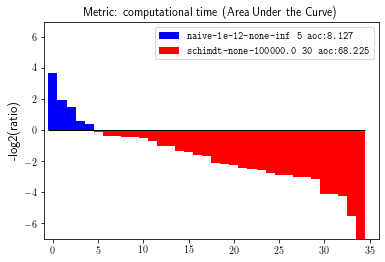

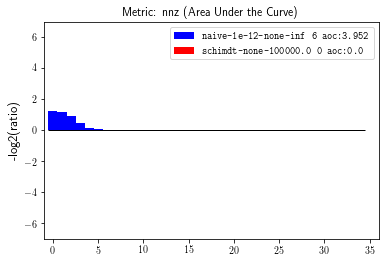

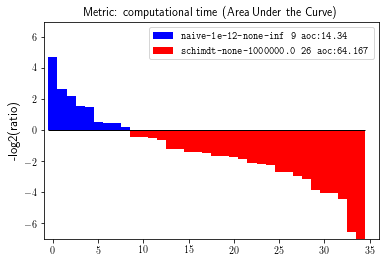

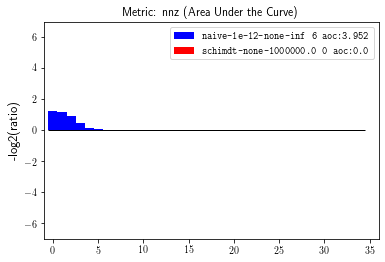

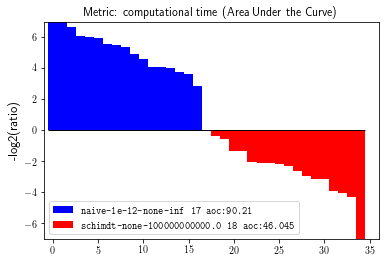

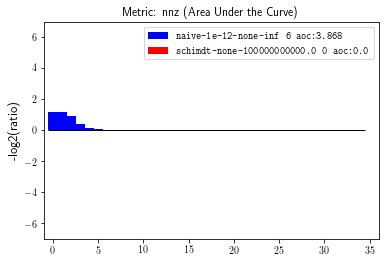

In [11]:
for c in [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11]:
    final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
    final[target] = df[target]
    schimdt_cheat = f'schimdt-none-{c}'
    final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})
    _ = ppf.plot(column='nnz',show_num=True, options={'ratio_max':7})
    print("===")

# ls

In [2]:
logdir='../IPG/test/log'; date='04_23_2021'; solver='naive'; loss='ls'; lam_shrink=[0.1, 0.01]; percent=[0.1, 0.2];

In [12]:
algo_df_dict_naive_adaptive = get_all_adaptive(logdir, date, loss, lam_shrink, percent, ts=[1e-12], excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_naive_adaptive)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='subgrad_iters', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
naive_adaptive_best = 'naive-1e-12-none-inf'
print('Best params:', naive_adaptive_best)

naive-1e-12-none-inf
 44/44 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
Best params: naive-1e-12-none-inf


In [13]:
algo_df_dict_schimdt = get_all_schimdt(logdir, date, loss, lam_shrink, percent, schimdt_consts=[1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11], 
                                       excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='subgrad_iters', plot=False,show_num=True, options={'ratio_max':4})
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)
# schimdt_best = 'schimdt-none-1.0'

schimdt-none-0.1
 36/44 instances terminate with status:  0
  8/44 instances terminate with status:  2
schimdt-none-1.0
 41/44 instances terminate with status:  0
  3/44 instances terminate with status:  2
schimdt-none-10.0
 43/44 instances terminate with status:  0
  1/44 instances terminate with status:  2
schimdt-none-100.0
 44/44 instances terminate with status:  0
schimdt-none-1000.0
 44/44 instances terminate with status:  0
schimdt-none-10000.0
 44/44 instances terminate with status:  0
schimdt-none-100000.0
 44/44 instances terminate with status:  0
schimdt-none-1000000.0
 44/44 instances terminate with status:  0
schimdt-none-100000000000.0
 40/44 instances terminate with status:  0
  3/44 instances terminate with status:  1
  1/44 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.
Best params: schimdt-none-100000.0


## No safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instances are kept.


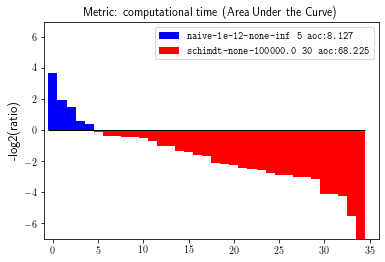

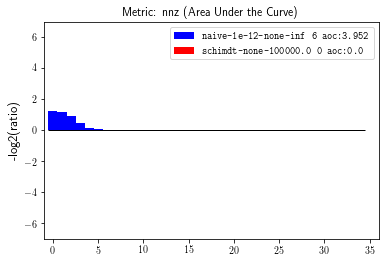

In [14]:
final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
# schimdt_cheat = 'schimdt-none-1000.0'
# final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})
_ = ppf.plot(column='nnz',show_num=True, options={'ratio_max':7})

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 36 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 34 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 34 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instances are kept.
===
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instances are kept.
===
All algorithms failed in 0 

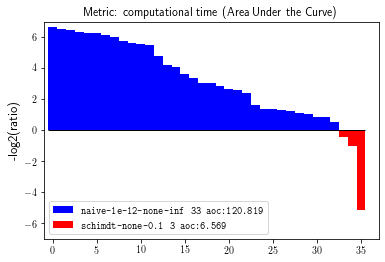

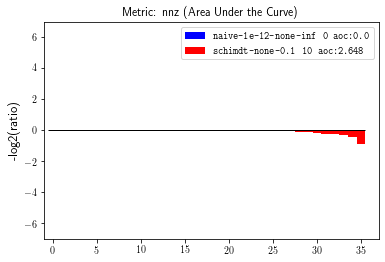

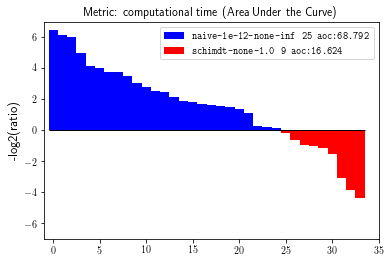

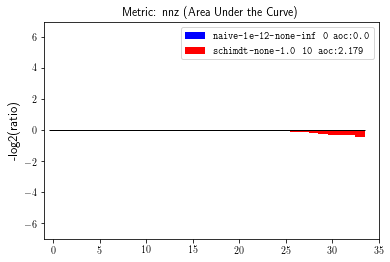

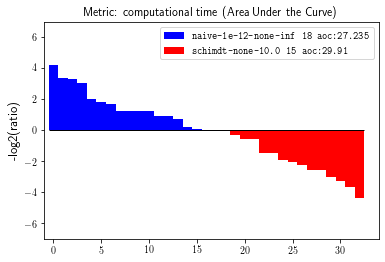

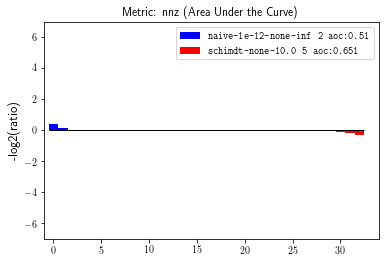

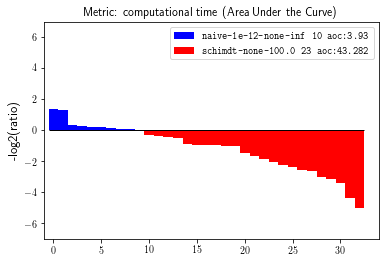

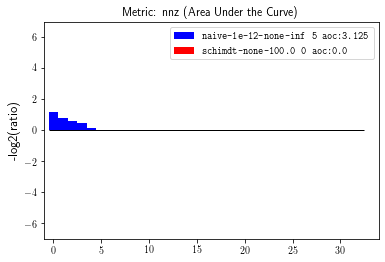

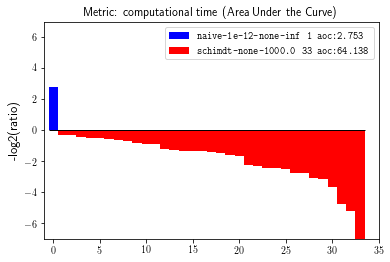

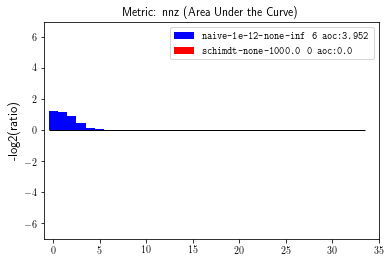

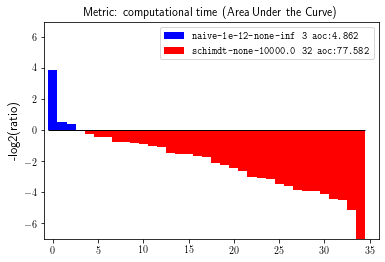

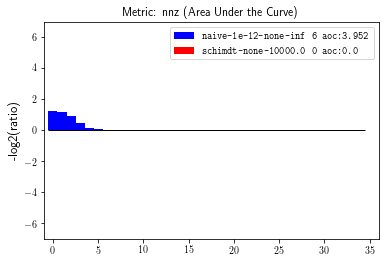

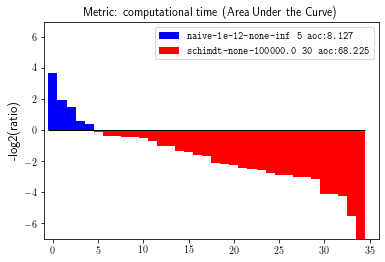

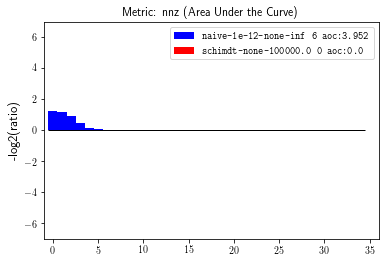

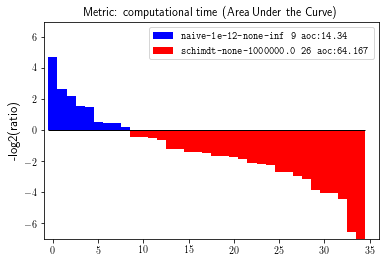

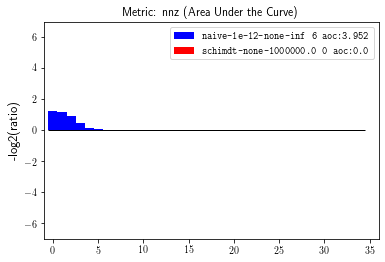

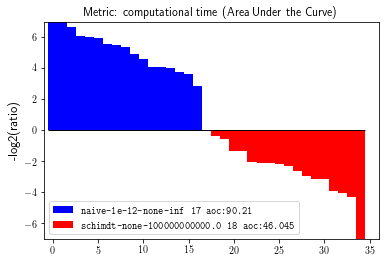

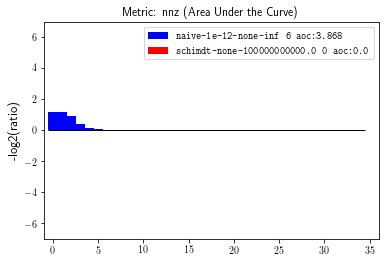

In [15]:
for c in [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11]:
    final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
    final[target] = df[target]
    schimdt_cheat = f'schimdt-none-{c}'
    final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})
    _ = ppf.plot(column='nnz',show_num=True, options={'ratio_max':7})    
    print("===")